##                                          TITLE: WEB ATTACK DETECTION

## Introduction

With increase in digitlization people across the world getting habituated to use digital technology for simple things to highly secure payment activities. In such cases every service provider has a responsibility to protect and safeguard the privacy of it's customers. One of the solutions to address these issues is to monitor webdata and detect anamaolies present if any and guide the servers to take an appropriate action. We tried using machine learning classification algorithms to address these issues

## Data Source

Website            : UCI Machine Learning Repository. 
Link               : https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data#. 
Instances / Records: There are 65532 records available, and each record has 12 attributes of data.
Number of Features : 12 (Example: Source Port, Number of Bytes Received, Packets,Packets Received)

## Python Code - Web Attack Detection

### Importing packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

### Reading cleaned data

In [2]:
df = pd.read_csv('log2.csv')

In [3]:
df.head() # Returns first five rows of dataset

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
df.info() # Returns the basic information of a dataset such as number of features and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
df.describe() # Returns the statistical parameters of features in dataset

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


### Checking for Missing values

In [6]:
df.isnull().sum() # Command for checking null values in all columns of dataset

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

### Understanding Action column

In [7]:
df['Action'].value_counts() # Returns the count of each category in 'Action' column

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

<AxesSubplot: >

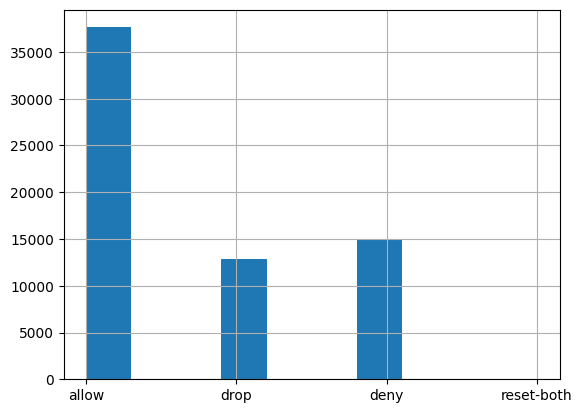

In [8]:
df['Action'].hist() # Visualizing 'Action' value

In [9]:
df.drop(df[df['Action'] == 'reset-both'].index, inplace = True) # Dropping records with 'Action' as 'reset-both'
df['Action'].value_counts() # Returns the count of each category in 'Action' column

allow    37640
deny     14987
drop     12851
Name: Action, dtype: int64

In [10]:
df.corr()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.331912,0.144721,-0.025136,0.000200,-0.000939,0.001916,-0.001769,-0.046853,-0.001440,-0.001999
Destination Port,-0.331912,1.000000,-0.281295,0.410521,-0.005289,0.001680,-0.014675,-0.006054,0.023693,-0.002127,-0.010899
NAT Source Port,0.144721,-0.281295,1.000000,0.178338,0.010654,0.002240,0.020819,0.012628,0.141432,0.007176,0.018765
NAT Destination Port,-0.025136,0.410521,0.178338,1.000000,0.003973,0.007903,-0.003221,0.004602,0.219750,0.006134,0.001743
Bytes,0.000200,-0.005289,0.010654,0.003973,1.000000,0.933462,0.830225,0.974379,0.148833,0.966548,0.850209
Bytes Sent,-0.000939,0.001680,0.002240,0.007903,0.933462,1.000000,0.575047,0.887596,0.126040,0.973976,0.639099
Bytes Received,0.001916,-0.014675,0.020819,-0.003221,0.830225,0.575047,1.000000,0.843067,0.143598,0.690959,0.946039
Packets,-0.001769,-0.006054,0.012628,0.004602,0.974379,0.887596,0.843067,1.000000,0.147073,0.961286,0.916978
Elapsed Time (sec),-0.046853,0.023693,0.141432,0.219750,0.148833,0.126040,0.143598,0.147073,1.000000,0.135101,0.143952
pkts_sent,-0.001440,-0.002127,0.007176,0.006134,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


### Dimensionality Reduction 

In [11]:
df.drop(['Bytes','Packets'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65478 entries, 0 to 65531
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65478 non-null  int64 
 1   Destination Port      65478 non-null  int64 
 2   NAT Source Port       65478 non-null  int64 
 3   NAT Destination Port  65478 non-null  int64 
 4   Action                65478 non-null  object
 5   Bytes Sent            65478 non-null  int64 
 6   Bytes Received        65478 non-null  int64 
 7   Elapsed Time (sec)    65478 non-null  int64 
 8   pkts_sent             65478 non-null  int64 
 9   pkts_received         65478 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 5.5+ MB


### Outlier Analysis / Understanding all features and their distributions

In [13]:
df['Source Port'].value_counts()

58638    840
27005    513
443      273
57470    222
49418    210
        ... 
43163      1
41958      1
10005      1
64445      1
54871      1
Name: Source Port, Length: 22692, dtype: int64

<AxesSubplot: >

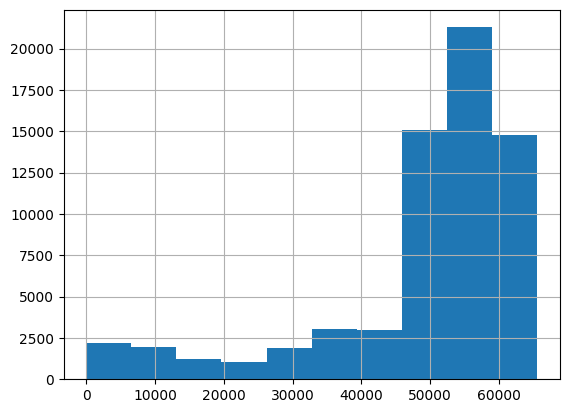

In [14]:
df['Source Port'].hist()

<AxesSubplot: >

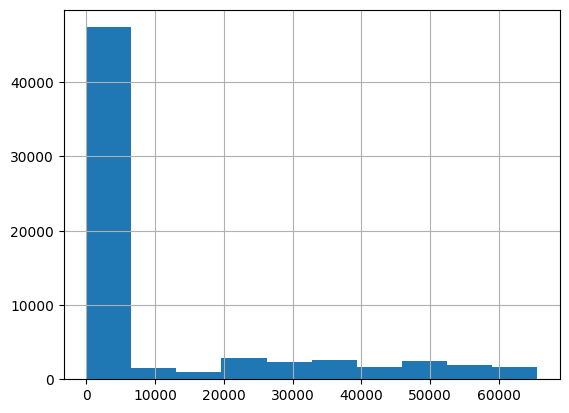

In [15]:
df['Destination Port'].hist()

<AxesSubplot: >

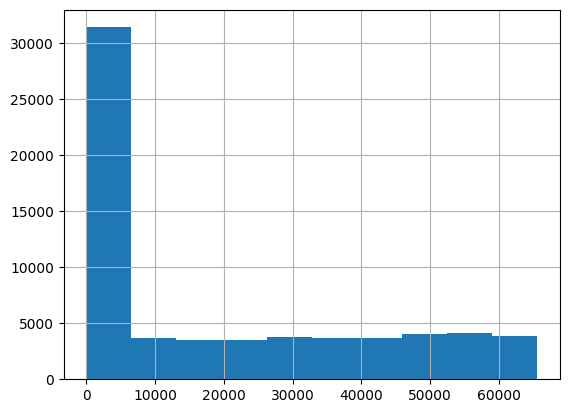

In [16]:
df['NAT Source Port'].hist()

<AxesSubplot: >

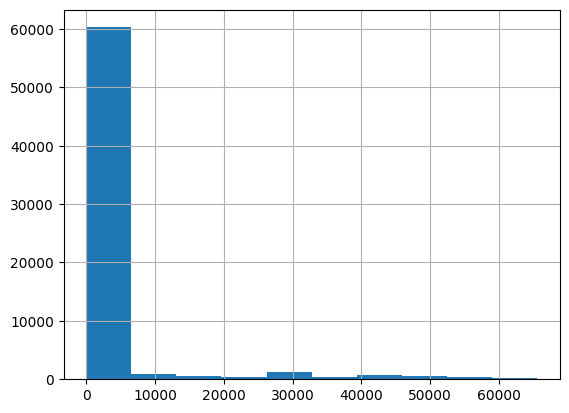

In [17]:
df['NAT Destination Port'].hist()

<AxesSubplot: >

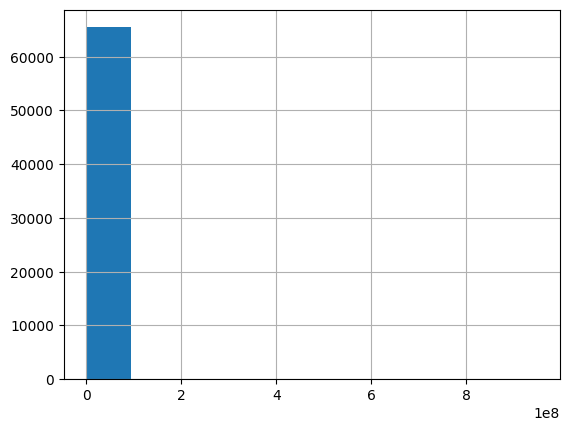

In [18]:
df['Bytes Sent'].hist()

<AxesSubplot: >

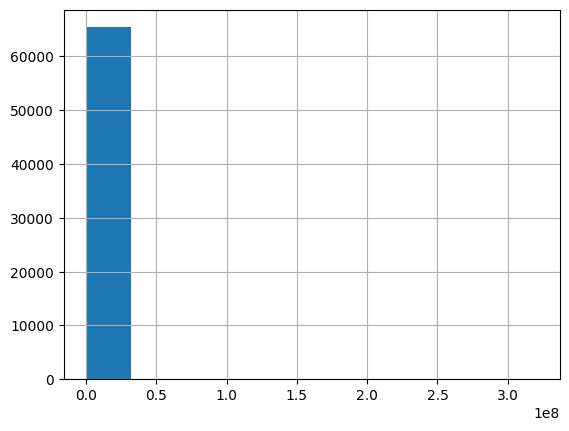

In [19]:
df['Bytes Received'].hist()

<AxesSubplot: >

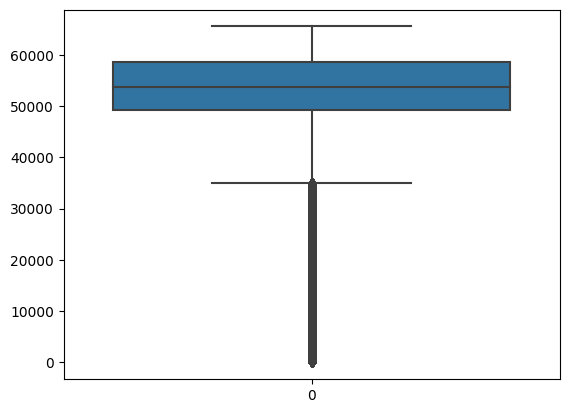

In [20]:
sns.boxplot(df['Source Port'])

<AxesSubplot: >

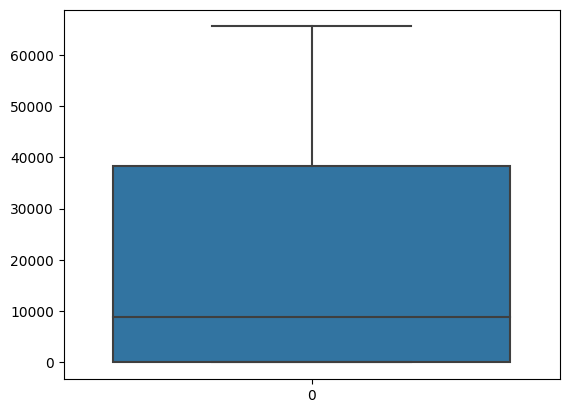

In [21]:
sns.boxplot(df['NAT Source Port'])

<AxesSubplot: >

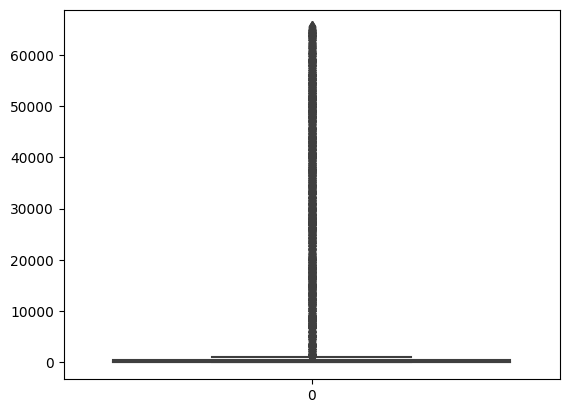

In [22]:
sns.boxplot(df['NAT Destination Port'])

<AxesSubplot: >

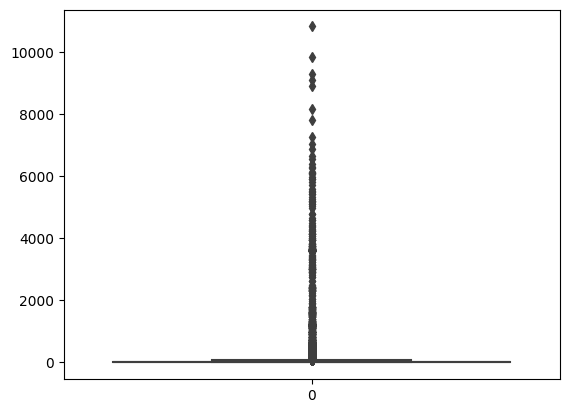

In [23]:
sns.boxplot(df['Elapsed Time (sec)'])

### After studying plots and value counts of all features, we observe there are no apprpriate outliers (every value is technically possible and we can just consider them outliers) but each feature has multiple normal distributions. So I decided to not consider them as outliers but to use z-score normalization to scale them 

In [24]:
# Applying z-score normalization on all features using their mean and standard deviation
df['Source Port'] = (df['Source Port']-df['Source Port'].mean())/df['Source Port'].std()
df['Destination Port'] = (df['Destination Port']-df['Destination Port'].mean())/df['Destination Port'].std()
df['NAT Source Port'] = (df['NAT Source Port']-df['NAT Source Port'].mean())/df['NAT Source Port'].std()
df['NAT Destination Port'] = (df['NAT Destination Port']-df['NAT Destination Port'].mean())/df['NAT Destination Port'].std()
df['Bytes Sent'] = (df['Bytes Sent']-df['Bytes Sent'].mean())/df['Bytes Sent'].std()
df['Bytes Received'] = (df['Bytes Received']-df['Bytes Received'].mean())/df['Bytes Received'].std()
df['Elapsed Time (sec)'] = (df['Elapsed Time (sec)']-df['Elapsed Time (sec)'].mean())/df['Elapsed Time (sec)'].std()
df['pkts_sent'] = (df['pkts_sent']-df['pkts_sent'].mean())/df['pkts_sent'].std()
df['pkts_received'] = (df['pkts_received']-df['pkts_received'].mean())/df['pkts_received'].std()

### Seperating features and Target Variable

In [25]:
from sklearn.preprocessing import LabelEncoder
X = df.drop("Action",axis=1)
Y = df['Action']
Y = df['Action']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)

### Seperating data into train and test parts

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train,y_train)
y_pred_LG = LG.predict(X_test)

Accuracy Score of Model on test set is  98.55829438895508 %
Classification Report               precision    recall  f1-score   support

       Allow       1.00      0.99      1.00     18823
        Deny       0.99      0.96      0.97      7491
        Drop       0.94      1.00      0.97      6425

    accuracy                           0.99     32739
   macro avg       0.98      0.98      0.98     32739
weighted avg       0.99      0.99      0.99     32739



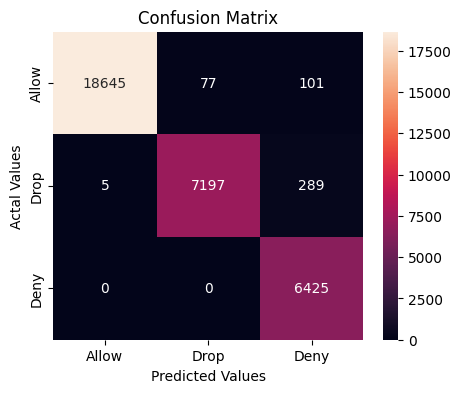

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Accuracy Score of Model on test set is ",LG.score(X_test,y_test)*100,"%")
print("Classification Report",classification_report(y_test,y_pred_LG,target_names=["Allow","Deny","Drop"]))
cm = confusion_matrix(y_test, y_pred_LG)
cm_df = pd.DataFrame(cm,
                     index = ['Allow','Drop','Deny'], 
                     columns = ['Allow','Drop','Deny'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Naive Classification using Dummy Classifier

In [29]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train,y_train)
y_pred_NC_train = clf.predict(X_train)
y_pred_NC_test = clf.predict(X_test)

Accuracy Score of Model on test set is  57.49412016249733 %
Classification Report               precision    recall  f1-score   support

       Allow       0.57      1.00      0.73     18823
        Deny       0.00      0.00      0.00      7491
        Drop       0.00      0.00      0.00      6425

    accuracy                           0.57     32739
   macro avg       0.19      0.33      0.24     32739
weighted avg       0.33      0.57      0.42     32739



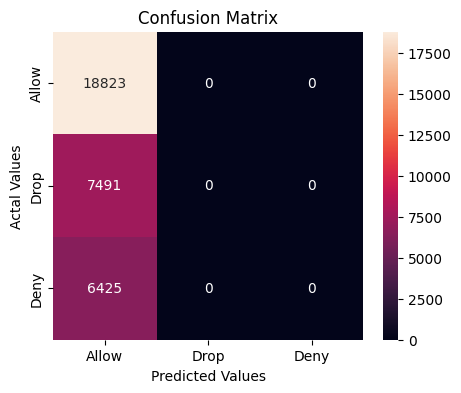

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Accuracy Score of Model on test set is ",clf.score(X_test,y_test)*100,"%")
print("Classification Report",classification_report(y_test,y_pred_NC_test,target_names=["Allow","Deny","Drop"]))
cm = confusion_matrix(y_test, y_pred_NC_test)
cm_df = pd.DataFrame(cm,
                     index = ['Allow','Drop','Deny'], 
                     columns = ['Allow','Drop','Deny'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Decision Tree with default Parameters

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy Score of DT on test set is  99.86560371422463 %
Classification Report               precision    recall  f1-score   support

       Allow       1.00      1.00      1.00     18823
        Deny       1.00      1.00      1.00      7491
        Drop       1.00      1.00      1.00      6425

    accuracy                           1.00     32739
   macro avg       1.00      1.00      1.00     32739
weighted avg       1.00      1.00      1.00     32739



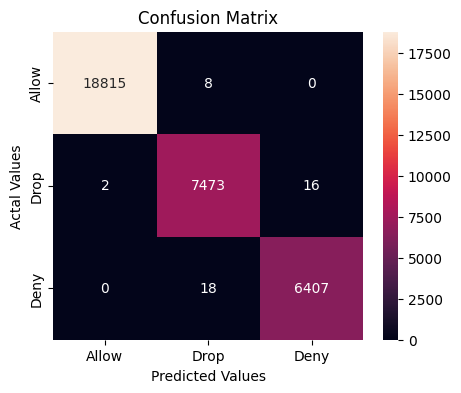

In [32]:
y_pred_DT = DT.predict(X_test)
print("Accuracy Score of DT on test set is ",DT.score(X_test,y_test)*100,"%")
print("Classification Report",classification_report(y_test,y_pred_DT,target_names=["Allow","Deny","Drop"]))
cm = confusion_matrix(y_test, y_pred_DT)
cm_df = pd.DataFrame(cm,index = ['Allow','Drop','Deny'], columns = ['Allow','Drop','Deny'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Hyperparameter Tuning for Decision Tree

In [33]:
from sklearn.model_selection import GridSearchCV
hyperparams = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), hyperparams, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [34]:
grid_search_cv.best_params_

{'max_leaf_nodes': 12, 'min_samples_split': 2}

### Decision Tree with tuned Hyperparameters

In [35]:
DT_tuned = DecisionTreeClassifier(max_leaf_nodes=8,min_samples_split=2)
DT_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

### Train Results

Accuracy Score of Model on train set is  99.91752955191056 %
Classification Report               precision    recall  f1-score   support

       Allow       0.57      0.57      0.57     18823
        Deny       0.23      0.23      0.23      7491
        Drop       0.20      0.20      0.20      6425

    accuracy                           0.42     32739
   macro avg       0.33      0.33      0.33     32739
weighted avg       0.42      0.42      0.42     32739



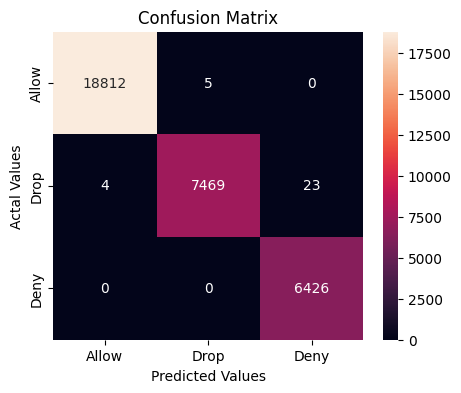

In [40]:
y_pred_DTT_train = DT_tuned.predict(X_train)
print("Accuracy Score of Model on train set is ",DT_tuned.score(X_test,y_test)*100,"%")
print("Classification Report",classification_report(y_test,y_pred_DTT_train,target_names=["Allow","Deny","Drop"]))
cm = confusion_matrix(y_train, y_pred_DTT_train)
cm_df = pd.DataFrame(cm,index = ['Allow','Drop','Deny'], columns = ['Allow','Drop','Deny'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Test Results

Accuracy Score of Model on test set is  99.91752955191056 %
Classification Report               precision    recall  f1-score   support

       Allow       1.00      1.00      1.00     18823
        Deny       1.00      1.00      1.00      7491
        Drop       1.00      1.00      1.00      6425

    accuracy                           1.00     32739
   macro avg       1.00      1.00      1.00     32739
weighted avg       1.00      1.00      1.00     32739



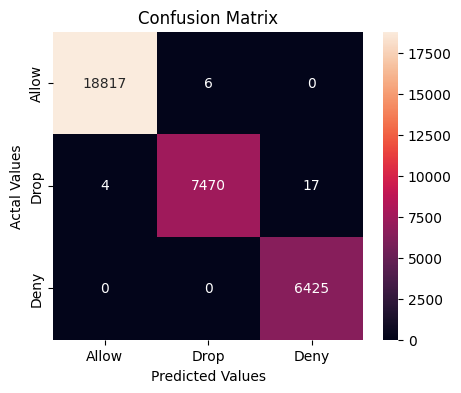

In [37]:
y_pred_DTT_test = DT_tuned.predict(X_test)
print("Accuracy Score of Model on test set is ",DT_tuned.score(X_test,y_test)*100,"%")
print("Classification Report",classification_report(y_test,y_pred_DTT_test,target_names=["Allow","Deny","Drop"]))
cm = confusion_matrix(y_test, y_pred_DTT_test)
cm_df = pd.DataFrame(cm,index = ['Allow','Drop','Deny'], columns = ['Allow','Drop','Deny'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df,fmt="d", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

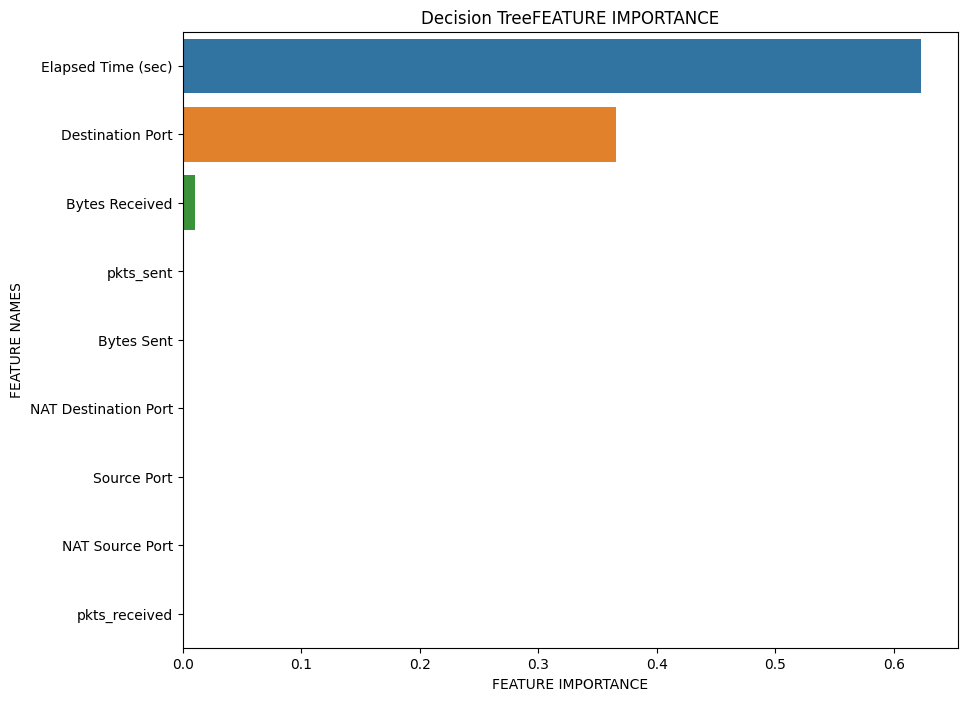

In [39]:
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
plot_feature_importance(DT_tuned.feature_importances_,X.columns,'Decision Tree')